## Initialisation

In [40]:
import os

import numpy as np
import pandas as pd

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\ode-biomarker-project


In [41]:
# Bring in CCLE data
from PathLoader import PathLoader
from DataLink import DataLink
path_loader = PathLoader('data_config.env', 'current_user.env')
data_link = DataLink(path_loader, 'data_codes.csv')

In [42]:
# attempt load from loading code

# fgfr4_model_raw_simulation
# cdk_model_downsampled_simulation

loading_code = 'cdk_model_downsampled_simulation'
simulation_data = data_link.get_data_from_code(loading_code)
plot_test = False
max_to_plot = -1

## Plotting

In [43]:
simulation_data

,Unnamed: 0,Cellline,Time,INSR,INSRpY,IRS,IRSi,S6KpT389,PI3K,INSRccIRSccPI3K,...,RBp,RBpp,E2FccRB,E2FccRBp,E2FccRBpp,CDK46ccCYCDccP21,CDK46ccCYCDccP27,CDK2ccCYCEccP21,CDK2ccCYCEccP27,CDK2ccCYCEccP27p
0,0,ACH-001113,1,520.582691,1.025712,14.895045,841.234700,66.310241,452.624757,0.011378,...,11.078342,177.432464,1.957924,418.582619,0.004415,281.288640,234.960774,104.382196,2.946210,0.002417
1,99,ACH-001113,100,520.294768,0.257661,96.062590,759.011182,9.276860,452.617703,0.018432,...,0.946859,413.129806,159.398692,36.571669,0.014962,0.001595,512.347434,135.182839,4.616340,0.003787
2,199,ACH-001113,200,520.297530,0.263281,95.082984,759.999170,9.384601,452.617493,0.018642,...,0.857584,415.443653,160.618249,33.130733,0.015042,0.001478,512.653229,139.398639,5.139346,0.004216
3,299,ACH-001113,300,520.297808,0.263848,94.983961,760.099038,9.395615,452.617472,0.018663,...,0.835230,416.019059,160.927861,32.268860,0.015063,0.001479,512.610897,143.485702,5.286814,0.004337
4,399,ACH-001113,400,520.297763,0.263758,94.997654,760.085210,9.394089,452.617476,0.018659,...,0.827366,416.220827,161.037466,31.965628,0.015070,0.001505,512.548040,147.482731,5.340165,0.004381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43581,4217599,ACH-000052,2600,685.706956,0.344262,100.019061,752.211251,8.830033,3334.987062,0.188936,...,0.596216,407.009095,158.635455,23.178644,0.014773,0.001512,375.021507,202.832748,5.345469,0.004385
43582,4217699,ACH-000052,2700,685.706956,0.344262,100.019065,752.211247,8.830033,3334.987062,0.188936,...,0.596210,407.010483,158.634293,23.178424,0.014773,0.001530,375.021593,205.252129,5.345540,0.004385
43583,4217799,ACH-000052,2800,685.706956,0.344262,100.019067,752.211245,8.830032,3334.987062,0.188936,...,0.596207,407.011787,158.633122,23.178295,0.014773,0.001548,375.021626,207.623382,5.345588,0.004386
43584,4217899,ACH-000052,2900,685.706956,0.344262,100.019068,752.211243,8.830032,3334.987062,0.188936,...,0.596205,407.013025,158.631952,23.178229,0.014773,0.001565,375.021622,209.947465,5.345619,0.004386


In [44]:
all_species = simulation_data.columns[2:]
all_celllines = simulation_data['Cellline'].unique()

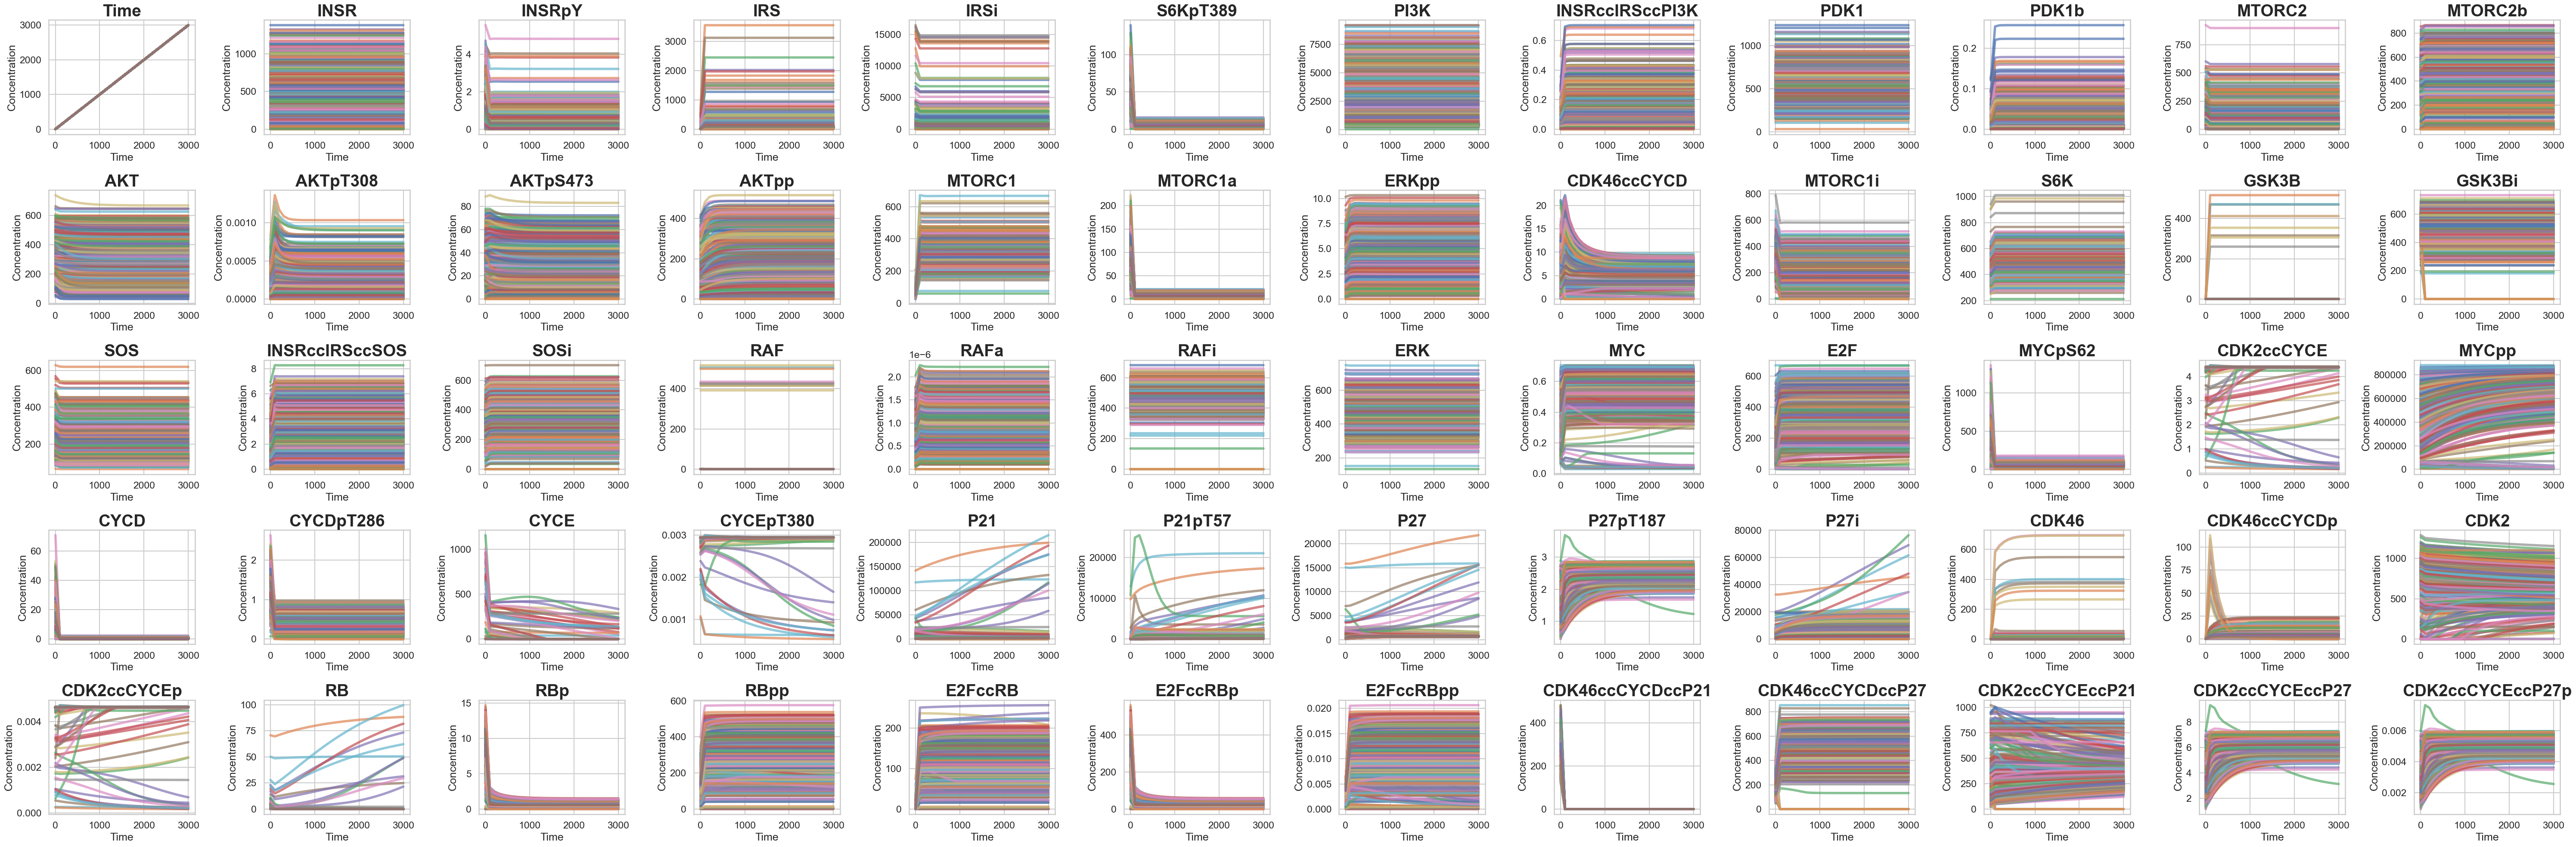

: 

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

import math

plot_cols = 12
plot_rows = math.ceil(len(all_species)/plot_cols)
sns.set_context('talk')
# sns.set_style('whitegrid')
plt.subplots(plot_rows, plot_cols, figsize=(5*plot_cols, 4*plot_rows))

# plot each species for each cell line, each specie as a subplot
for i, specie in enumerate(all_species):
    plt.subplot(plot_rows, plot_cols, i+1)
    celllines_to_plot = all_celllines[:5] if plot_test else all_celllines
    if max_to_plot != -1:
        celllines_to_plot = all_celllines[:max_to_plot]
    for cellline in celllines_to_plot:
        cellline_data = simulation_data[simulation_data['Cellline'] == cellline]
        plt.plot(cellline_data['Time'], cellline_data[specie], linewidth=4, alpha=0.7)
    plt.title(specie, fontsize=28, fontweight='bold')
    plt.xlabel('Time')
    plt.ylabel('Concentration')

plt.tight_layout()
plt.show()